# Sprint 1

## Machine Learning Flow

### [Problem 1] Cross Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('application_train.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [38]:
# Select 2 variables as in the pre-assignment
X = df[['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']].values
y = df['TARGET'].values

In [4]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
    
kf = KFold(n_splits=5, shuffle=True)
i = 0
for train_idx, test_idx in kf.split(X):
    
    i += 1
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    #Normalize the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    dt = DecisionTreeClassifier()
    dt.fit(X_train_scaled, y_train)
    dt_predict = dt.predict(X_test_scaled)
    
    p1 = dt.score(X_train_scaled, y_train)
    p2 = dt.score(X_test_scaled, y_test)
    
    print('Sample {}:\n- Train Score {}\n- Test Score {}'.format(i, p1, p2))

Sample 1:
- Train Score 0.9235390719001008
- Test Score 0.9117116238232281
Sample 2:
- Train Score 0.923880833628038
- Test Score 0.9106695717212449
Sample 3:
- Train Score 0.923933677223191
- Test Score 0.9099541478325908
Sample 4:
- Train Score 0.9235719018409896
- Test Score 0.9123117947383825
Sample 5:
- Train Score 0.9233605274603774
- Test Score 0.9133198920360314


In [6]:
#Get score with cross_val_score
from sklearn.model_selection import cross_val_score

print(cross_val_score(DecisionTreeClassifier(), X, y, cv=5))

[0.91089866 0.91091347 0.9104582  0.91210042 0.91208416]


In [7]:
#Test with KNeighborsClassifier() in different k values
val_score = []
for k in range(1, 20):
    score = cross_val_score(KNeighborsClassifier(k), X, y, cv=5).mean()
    val_score.append(score)

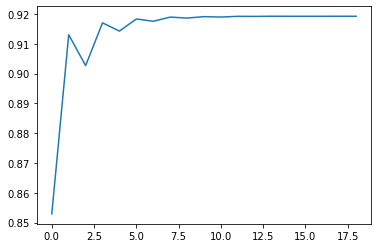

In [26]:
plt.plot(val_score)
plt.show()

### [Problem 2] Grid Search

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(230633, 2) (76878, 2) (230633,) (76878,)


In [10]:
# Normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 20),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [12]:
grid.best_score_

0.9194868037571082

In [13]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 16}

In [14]:
model = grid.best_estimator_

In [15]:
model.score(X_test, y_test)

0.9186243138479149

### [Problem 3] Survey from Kaggle Notebooks

List of used methods:
- XGBClassifier(n_estimators=500, max_depth=8, random_state=2018)
- RandomForestClassifier(n_estimators=128, random_state=42, n_jobs=-1)
- LogisticRegression(C = 0.0001)

### [Problem 4] Creating a model with high generalization performance

In [33]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1 ,1]}
grid_log = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]})

In [34]:
grid_log.best_score_

0.9194868037571082

In [35]:
grid_log.best_params_

{'C': 0.0001}

In [36]:
model_log = grid_log.best_estimator_

In [37]:
model_log.score(X_test, y_test)

0.9186243138479149

In [20]:
param_grid = {'n_estimators': [32, 64, 128, 256, 512]}
grid_clf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'n_estimators': [32, 64, 128, 256, 512]})

In [28]:
grid_clf.best_score_

0.9076324736939065

In [29]:
grid_clf.best_params_

{'n_estimators': 512}

In [32]:
model_clf = grid_clf.best_estimator_
model_clf.score(X_test, y_test)

0.9090116808449752

Tested model:
- LogisticRegression with different C values (1, 0.1, 0.001, 0.0001). The best C value is 0.0001.
- RandomForestClassifier with different n_estimators values. The best n_estimators value is 512.

### [Problem 5] Final model selection

We will choose LogisticRegression with C = 0.0001 for estimating results.

[Notebook from pre-assignment](https://www.kaggle.com/dungdore1312/dic-as-13)

[Notebook from Sprint 1 assignment](https://www.kaggle.com/dungdore1312/dic-as-14)

Score from pre-assignment:
- Private score: 0.52964
- Public score: 0.54379

Score from this assignment:
- Private score: 0.59934
- Public score: 0.61461

**Conclusion:** Even though the model selection gave us a higher score, we still need to explore more models and improve feature engineering to get better improvement.